In [12]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

rolling_period = 20

def read_system_json(algo, env, env_n, seed):
    seed = f"seed_{seed}"
    path = f"../results/{algo}/{env}/envs_{env_n}/{seed}/"
    with open(path + "metrics.json", "r") as f:
        data = json.load(f)

    data = data[env][algo][seed]
    records = {}
    for key in data.keys():
        n = key.split("_")[1]
        if len(n) > 3: continue # skip abs metric
        entry = {"mean_episode_returns": data[key]["mean_episode_returns"][0]}
        records[int(n)] = entry
    df = pd.DataFrame.from_dict(records, orient="index")
    df[f"rolling_{rolling_period}"] = df["mean_episode_returns"].rolling(rolling_period, min_periods=1).mean()
    
    return df

[88.65999794006348, 93.64999771118164, 116.89999771118164, 97.4599983215332, 110.40999717712403]
Difference: 28.239999771118164


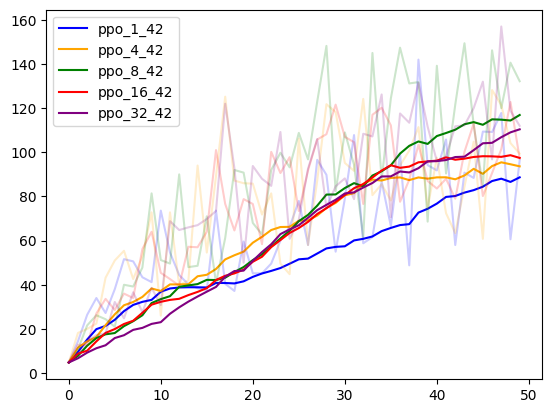

In [13]:
env = "SpaceInvaders-MinAtar"

env_ns = [1, 4, 8, 16, 32]
seeds = [42]
colors = ['blue', "orange", 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

ax = plt.gca()

i = 0
labels = []
last_vals = []
for env_n in env_ns:
    for seed in seeds:
        df = read_system_json("ppo", env, env_n, seed)
        df.plot(y="mean_episode_returns", label=None, alpha=0.2, ax=ax, color=colors[i])
        df.plot(y="rolling_20", label=f"ppo_{env_n}_{seed}", ax=ax, color=colors[i])
        labels.append(f"ppo_{env_n}_{seed}")
        last_vals.append(df["rolling_20"].iloc[-1])

        i += 1

l, h = ax.get_legend_handles_labels()
plt.legend(l[1::2], h[1::2], loc='upper left')

print(last_vals)

print(f"Difference: {max(last_vals) - min(last_vals)}")


[88.25999736785889, 115.63999786376954, 110.42999801635742, 126.14999771118164, 108.22999801635743]
Difference: 37.890000343322754


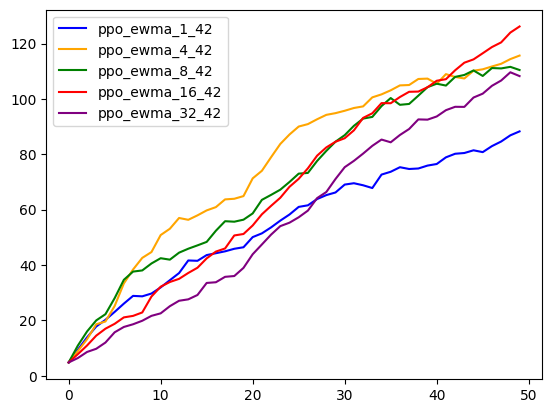

In [16]:
env = "SpaceInvaders-MinAtar"

env_ns = [1, 4, 8, 16, 32]
# env_ns = [1, 4, 8, 16]
seeds = [42]
colors = ['blue', "orange", 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

ax = plt.gca()

i = 0
labels = []
last_vals = []
for env_n in env_ns:
    for seed in seeds:
        df = read_system_json("ppo_ewma", env, env_n, seed)
        # df.plot(y="mean_episode_returns", alpha=0.2, ax=ax, color=colors[i])
        df.plot(y="rolling_20", label=f"ppo_ewma_{env_n}_{seed}", ax=ax, color=colors[i])


        labels.append(f"ppo_{env_n}_{seed}")
        last_vals.append(df["rolling_20"].iloc[-1])

        i += 1

# l, h = ax.get_legend_handles_labels()
# plt.legend(l[1::2], h[1::2], loc='upper left')

print(last_vals)
print(f"Difference: {max(last_vals) - min(last_vals)}")

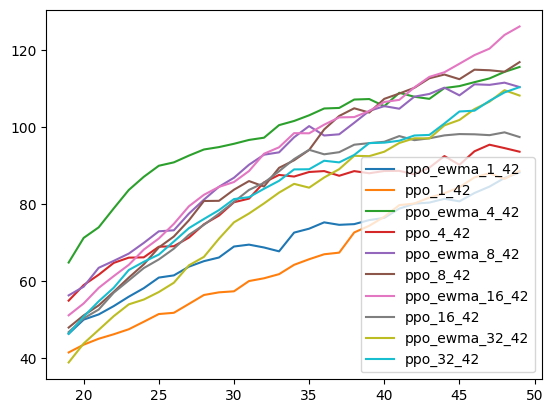

In [13]:
env = "SpaceInvaders-MinAtar"

env_ns = [1, 4, 8, 16, 32]
seeds = [42]
colors = ['blue', "orange", 'green', 'red', 'yellow', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

ax = plt.gca()

i = 0
for env_n in env_ns:
    for seed in seeds:
        df_e = read_system_json("ppo_ewma", env, env_n, seed)
        df = read_system_json("ppo", env, env_n, seed)

        if df_e is not None:
            df_e.plot(y="rolling_20", label=f"ppo_ewma_{env_n}_{seed}", ax=ax)

        if df is not None:
            df.plot(y="rolling_20", label=f"ppo_{env_n}_{seed}", ax=ax)


        i += 1


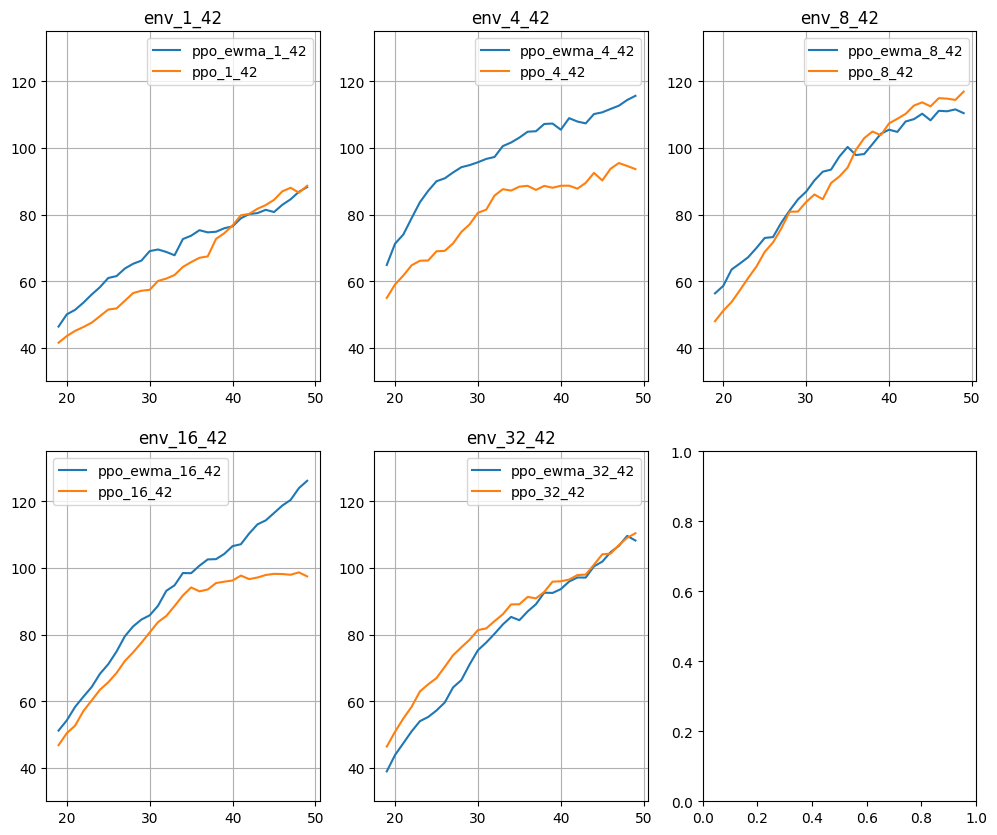

In [54]:
env = "SpaceInvaders-MinAtar"

env_ns = [1, 4, 8, 16, 32]
seeds = [42]
colors = ['blue', "orange", 'green', 'red', 'yellow', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# ax = plt.gca()
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(12, 10))

i = 0
for env_n in env_ns:
    for seed in seeds:
        ax = axs[i//3][i%3]
        df = read_system_json("ppo_ewma", env, env_n, seed)
        df.plot(y="rolling_20", label=f"ppo_ewma_{env_n}_{seed}", ax=ax)

        df = read_system_json("ppo", env, env_n, seed)
        df.plot(y="rolling_20", label=f"ppo_{env_n}_{seed}", ax=ax)

        ax.grid(True)
        ax.set_title(f"env_{env_n}_{seed}")
        ax.set_ylim(30, 135)


        i += 1
